# Email Phishing Detection Model

## About Dataset

The Email Phishing Dataset, compiled by user Ethan Cratchley on kaggle, is a combination of two different datasets containing "safe" emails from The Enron Email Dataset, along with phishing and "safe" emails from The Phishing Email Dataset. The dataset includes features such as the number of words, unique words, stopwords, links, unique domains, email addresses, and spelling errors, along with associated labels. The purpose of this dataset is to use machine learning to train a model that would be able to detect phishing emails. Companies and corporations can use this model to identify phishing emails, preventing attacks, and protecting sensitive information and data. In addition, Cybersecurity teams can use the model to find patterns in phishing emails, allowing them to finetune and improve the model.

# 1. Data Preprocessing


- Perform exploratory data analysis (EDA) to gain insights into the dataset's structure and distributions.
- Handle missing values, outliers, and any inconsistencies in the data.
- Encode categorical variables and normalize numerical features as necessary.
- Split the dataset into training and testing sets, ensuring a proper balance of classes.
- Discuss your applied techniques to tackle data imbalancedness if you are working on an imbalanced dataset



In [ ]:
# importing initial libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
# importing and reading data set
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['email_phishing_data.csv']))
df.head()

Saving email_phishing_data.csv to email_phishing_data.csv


,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [ ]:
df.shape # check for size and shape of data set

(524846, 9)

In [ ]:
df.dtypes # check for catergorical values


,0
num_words,int64
num_unique_words,int64
num_stopwords,int64
num_links,int64
num_unique_domains,int64
num_email_addresses,int64
num_spelling_errors,int64
num_urgent_keywords,int64
label,int64


In [ ]:
df[df.duplicated()] # check for duplicated rows

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
12,923,355,309,0,0,0,51,0,0
14,5,5,1,0,0,0,0,0,0
25,1400,505,546,0,0,5,35,1,0
49,803,376,335,0,0,4,21,0,0
55,803,376,335,0,0,4,21,0,0
...,...,...,...,...,...,...,...,...,...
524817,28,22,0,0,0,0,5,0,0
524831,16,14,3,0,0,0,1,0,0
524837,48,37,20,0,0,0,0,0,0
524843,61,46,11,0,0,0,3,0,0


In [ ]:
df.isna().sum() # check for missing values

,0
num_words,0
num_unique_words,0
num_stopwords,0
num_links,0
num_unique_domains,0
num_email_addresses,0
num_spelling_errors,0
num_urgent_keywords,0
label,0


In [ ]:
df.describe() # check for statistical values

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,5.248460e+05,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000
mean,2.762280e+02,123.012167,80.045465,0.895588,0.347767,2.114897,24.694731,0.245301,0.013240
std,3.335457e+03,201.626478,1023.330380,5.603001,1.774209,13.592682,311.312358,0.559320,0.114301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,38.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.200000e+02,79.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.690000e+02,145.000000,79.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000
max,2.339682e+06,51251.000000,720411.000000,824.000000,524.000000,1150.000000,190104.000000,7.000000,1.000000


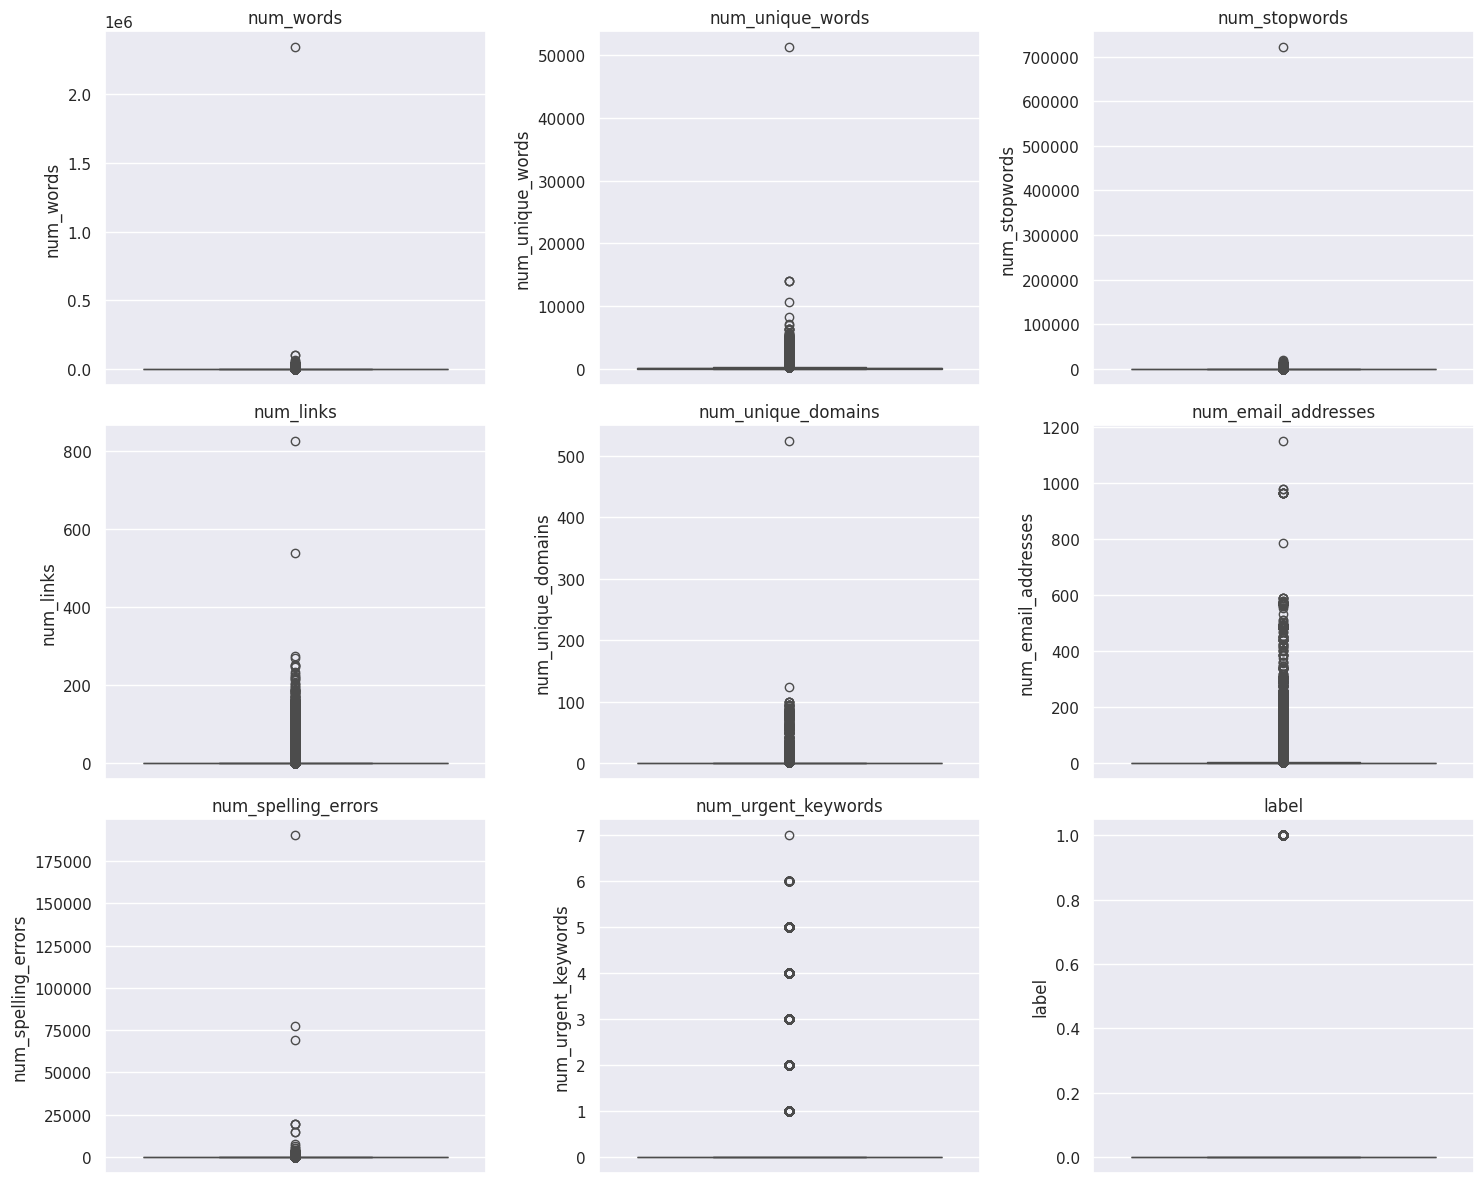

In [ ]:
# visualizing columns to find outliers
numeric_cols = df.select_dtypes(include='number').columns

# deleting 'labels'
for i, col in enumerate(numeric_cols):
    if col == 'label':
        numeric_cols = np.delete(numeric_cols, i)
        break

n = len(numeric_cols)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

